# Guide to Winning📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Some college football teams/programs are known for winning all the time. What is the difference between these teams and teams that do not.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How do college football dynasties happen? What gives a college football team the edge to win? Are there certain factors that great teams have that help them win?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The answers could be anywhere from ability to recruit, if it was just straight ability to coach, could it be location and weather, and so on. As for graphics it will be charts that can describe different aspects of the game and give percentages and numbers back showing different things including win probability.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

I found a great website that allows you to query for data and download csv files. I have also found a dataset on Kaggle. I am also going to use Pro Football Focus' (PFF) data.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

Working for the team here at UC gives me excellent resources and I am going to start with finding data I think I will need. I have a meeting scheduled with the guy who is in charge of the teams analytics about what he does and where he finds his data and how he uses it.

In [1]:
# Start your code here
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019', './data')

Dataset URL: https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019


100%|██████████| 585k/585k [00:00<00:00, 6.02MB/s]

In [5]:
import pandas as pd


df = pd.read_csv('Data/Data1.csv')



print(df.head())

   Year  TeamId        Team         Conference Division  ExpectedWins  \
0  2015    2132  Cincinnati  American Athletic     East           8.3   
1  2006    2132  Cincinnati           Big East      NaN           0.0   
2  1954    2132  Cincinnati   FBS Independents      NaN           0.0   
3  1982    2132  Cincinnati   FBS Independents      NaN           0.0   
4  1965    2132  Cincinnati    Missouri Valley      NaN           0.0   

   Total Games  Total Wins  Total Losses  Total Ties  ...  \
0           13           7             6           0  ...   
1           13           8             5           0  ...   
2           10           8             2           0  ...   
3           11           6             5           0  ...   
4           10           5             5           0  ...   

   ConferenceGames Losses  ConferenceGames Ties  HomeGames Games  \
0                       4                     0                6   
1                       3                     0           

In [6]:
import pandas as pd


df = pd.read_csv('Data/Recruiting.csv')



print(df.head())

   Year  Rank        Team  Points
0  2000    44  Cincinnati    0.00
1  2001    51  Cincinnati    0.00
2  2002    76  Cincinnati   87.58
3  2003    96  Cincinnati   82.93
4  2004   104  Cincinnati   72.99


## Explatory Data Analysis


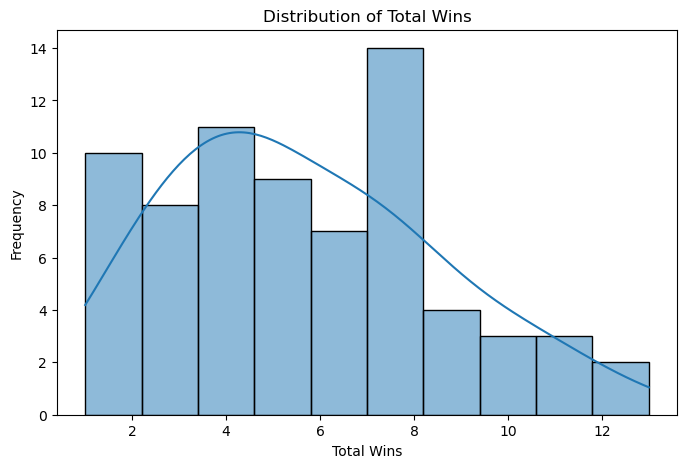

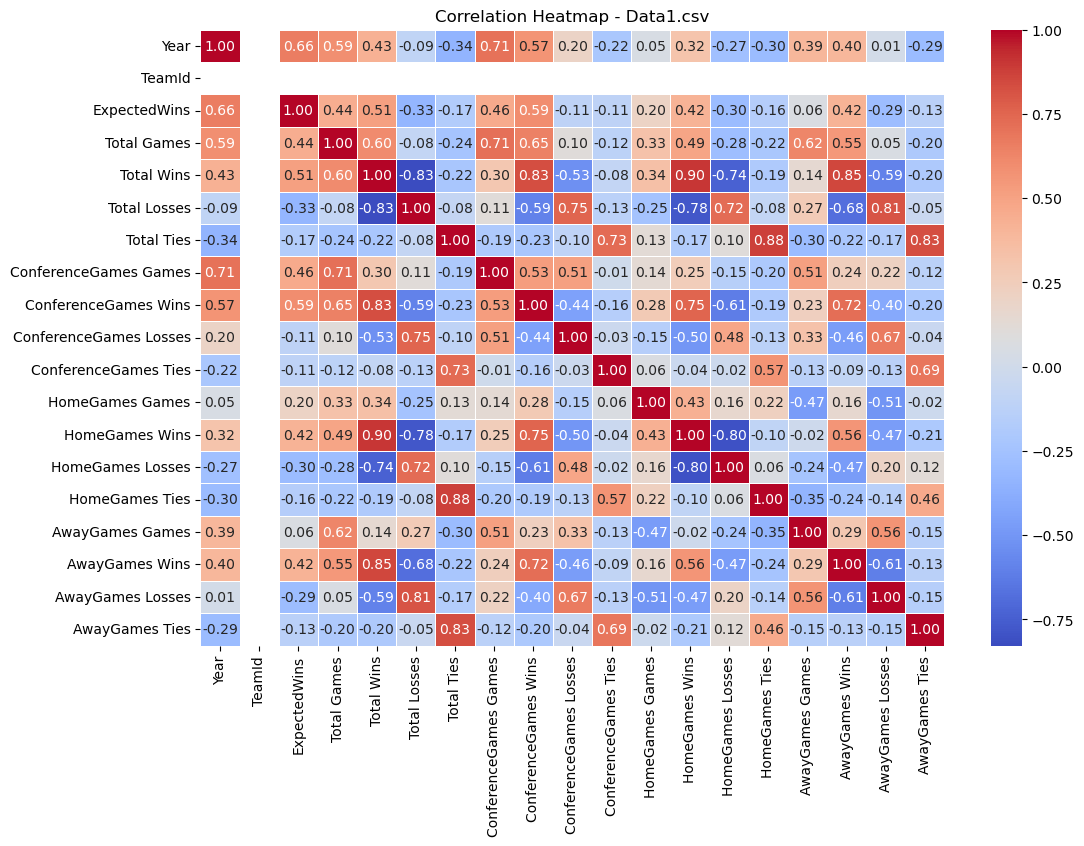

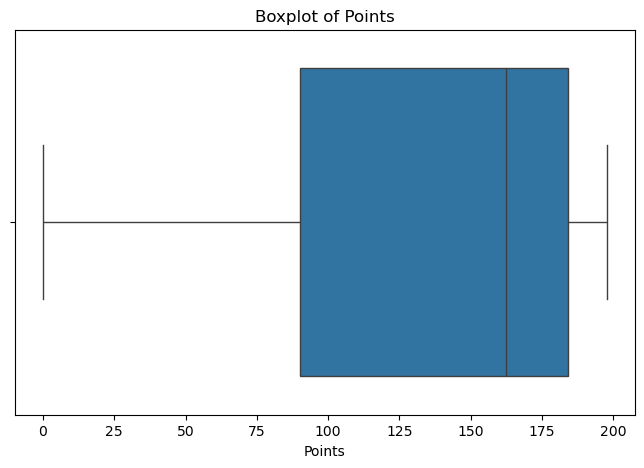

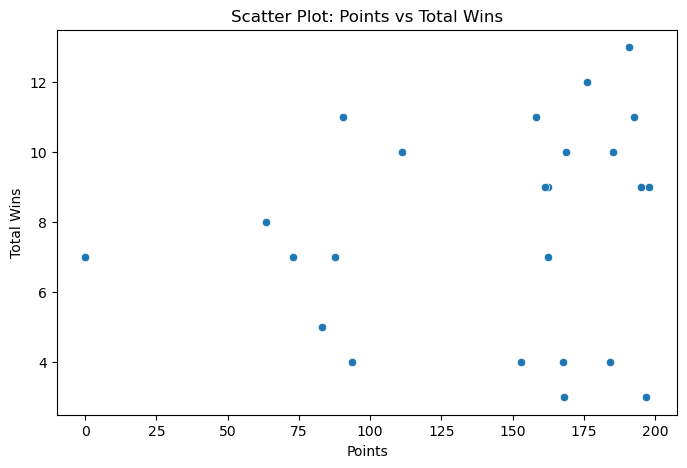

{'Data1 Summary':               Year  TeamId  ExpectedWins  Total Games  Total Wins  \
 count    71.000000    71.0     71.000000    71.000000   71.000000   
 mean   1989.000000  2132.0      1.511268    11.211268    5.633803   
 std      20.639767     0.0      3.117488     1.433432    2.874715   
 min    1954.000000  2132.0      0.000000     5.000000    1.000000   
 25%    1971.500000  2132.0      0.000000    10.500000    3.500000   
 50%    1989.000000  2132.0      0.000000    11.000000    5.000000   
 75%    2006.500000  2132.0      0.000000    12.000000    7.500000   
 max    2024.000000  2132.0     10.900000    14.000000   13.000000   
 
        Total Losses  Total Ties  ConferenceGames Games  ConferenceGames Wins  \
 count     71.000000   71.000000              71.000000             71.000000   
 mean       5.408451    0.169014               5.746479              2.746479   
 std        2.302654    0.477670               2.162791              2.109288   
 min        1.000000    0.0

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data1 = pd.read_csv("./Data/Data1.csv")
recruiting_data = pd.read_csv("./Data/Recruiting.csv")

merged_data = pd.merge(data1, recruiting_data, on=["Year", "Team"], how="left")

data1_summary = data1.describe()
recruiting_data_summary = recruiting_data.describe()

plt.figure(figsize=(8, 5))
sns.histplot(data=data1, x="Total Wins", bins=10, kde=True)
plt.title("Distribution of Total Wins")
plt.xlabel("Total Wins")
plt.ylabel("Frequency")
plt.show()

numeric_data1 = data1.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data1.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Data1.csv")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=recruiting_data, x="Points")
plt.title("Boxplot of Points")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x="Points", y="Total Wins")
plt.title("Scatter Plot: Points vs Total Wins")
plt.xlabel("Points")
plt.ylabel("Total Wins")
plt.show()

data1_missing = data1.isnull().sum()
recruiting_data_missing = recruiting_data.isnull().sum()
data1_duplicates = data1.duplicated().sum()
recruiting_data_duplicates = recruiting_data.duplicated().sum()

{
    "Data1 Summary": data1_summary,
    "Recruiting Data Summary": recruiting_data_summary,
    "Missing Values in Data1": data1_missing,
    "Missing Values in Recruiting Data": recruiting_data_missing,
    "Duplicate Values in Data1": data1_duplicates,
    "Duplicate Values in Recruiting Data": recruiting_data_duplicates
}


## Data Cleaning

In [5]:
data1_cleaned = data1.drop(columns=['Division'])

missing_values_data1 = data1_cleaned.isnull().sum()

data1_cleaned_info = data1_cleaned.info()

upper_limit = data1_cleaned['Total Wins'].quantile(0.95)
data1_cleaned = data1_cleaned[data1_cleaned['Total Wins'] <= upper_limit]

data1_cleaned = data1_cleaned.drop_duplicates()

merged_cleaned_data = pd.merge(data1_cleaned, recruiting_data, on=["Year", "Team"], how="left")

merged_cleaned_missing = merged_cleaned_data.isnull().sum()
merged_cleaned_shape = merged_cleaned_data.shape

{
    "Missing Values in Cleaned Data1": missing_values_data1,
    "Data1 Cleaned Info": data1_cleaned_info,
    "Outliers Removed (95th Percentile of Total Wins)": upper_limit,
    "Missing Values in Merged Dataset": merged_cleaned_missing,
    "Merged Dataset Shape": merged_cleaned_shape
}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    71 non-null     int64  
 1   TeamId                  71 non-null     int64  
 2   Team                    71 non-null     object 
 3   Conference              71 non-null     object 
 4   ExpectedWins            71 non-null     float64
 5   Total Games             71 non-null     int64  
 6   Total Wins              71 non-null     int64  
 7   Total Losses            71 non-null     int64  
 8   Total Ties              71 non-null     int64  
 9   ConferenceGames Games   71 non-null     int64  
 10  ConferenceGames Wins    71 non-null     int64  
 11  ConferenceGames Losses  71 non-null     int64  
 12  ConferenceGames Ties    71 non-null     int64  
 13  HomeGames Games         71 non-null     int64  
 14  HomeGames Wins          71 non-null     int6

{'Missing Values in Cleaned Data1': Year                      0
 TeamId                    0
 Team                      0
 Conference                0
 ExpectedWins              0
 Total Games               0
 Total Wins                0
 Total Losses              0
 Total Ties                0
 ConferenceGames Games     0
 ConferenceGames Wins      0
 ConferenceGames Losses    0
 ConferenceGames Ties      0
 HomeGames Games           0
 HomeGames Wins            0
 HomeGames Losses          0
 HomeGames Ties            0
 AwayGames Games           0
 AwayGames Wins            0
 AwayGames Losses          0
 AwayGames Ties            0
 dtype: int64,
 'Data1 Cleaned Info': None,
 'Outliers Removed (95th Percentile of Total Wins)': 11.0,
 'Missing Values in Merged Dataset': Year                       0
 TeamId                     0
 Team                       0
 Conference                 0
 ExpectedWins               0
 Total Games                0
 Total Wins                 0
 Total 

# **Machine Learning Plan**

## **1. Type of Model**
- We are using **Classification models** to predict whether a team will have a winning season (target: `win_flag`).
- Models being tested:
  - **Logistic Regression**: A baseline linear model for classification.
  - **Random Forest Classifier**: A robust ensemble method for handling both numeric and categorical features.

---

## **2. Challenges Identified**
- **Mixed Data Types**:
  - The dataset contains both numeric (e.g., `ExpectedWins`, `total_wins`) and categorical (e.g., `team`, `Conference`) features.
  - Categorical features need to be encoded before training.
- **Imbalanced Data**:
  - The distribution of the target variable (`win_flag`) is close to balanced but should be monitored.
- **Missing Data**:
  - Some features may have missing values that need to be handled appropriately.
- **Feature Scaling**:
  - Numeric features vary in scale and need normalization or standardization for optimal model performance.
- **Dimensionality**:
  - A mix of 22 features might require feature selection or dimensionality reduction to improve interpretability and avoid overfitting.

---

## **3. Plan to Address Challenges**
- **Handling Missing Values**:
  - Numeric features: Imputed using the mean.
  - Categorical features: Imputed using the most frequent value.
- **Encoding Categorical Variables**:
  - One-hot encoding is applied to convert categorical features into numeric format.
- **Scaling Numeric Features**:
  - Applied StandardScaler to ensure numeric features are standardized (mean = 0, variance = 1).
- **Model Evaluation**:
  - Split data into training and testing sets (80/20 split).
  - Evaluate performance using metrics such as accuracy, precision, recall, and F1-score.
- **Feature Selection**:
  - Used correlation analysis to identify and prioritize the most impactful features.
  - Further feature importance analysis with Random Forest.
- **Hyperparameter Tuning**:
  - Experimented with parameters like `max_depth` for Random Forest and `C` for Logistic Regression to optimize performance.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data1_path = "./Data/Data1.csv"
recruiting_path = "./Data/Recruiting.csv"

data1 = pd.read_csv(data1_path)
recruiting = pd.read_csv(recruiting_path)

print("Columns in Data1:", data1.columns)
print("Columns in Recruiting:", recruiting.columns)

data1.rename(columns={'Team': 'team'}, inplace=True)
recruiting.rename(columns={'Team': 'team'}, inplace=True)

data1['team'] = data1['team'].str.strip().str.lower()
recruiting['team'] = recruiting['team'].str.strip().str.lower()

if 'year' in data1.columns and 'year' in recruiting.columns:
    df = pd.merge(data1, recruiting, how="inner", on=["team", "year"])
else:
    df = pd.merge(data1, recruiting, how="inner", on="team")

print("Merged DataFrame Info:")
print(df.info())
print("First 5 rows of the Merged DataFrame:")
print(df.head())


Columns in Data1: Index(['Year', 'TeamId', 'team', 'Conference', 'Division', 'ExpectedWins',
       'Total Games', 'total_wins', 'total_losses', 'Total Ties',
       'ConferenceGames Games', 'ConferenceGames Wins',
       'ConferenceGames Losses', 'ConferenceGames Ties', 'HomeGames Games',
       'HomeGames Wins', 'HomeGames Losses', 'HomeGames Ties',
       'AwayGames Games', 'AwayGames Wins', 'AwayGames Losses',
       'AwayGames Ties'],
      dtype='object')
Columns in Recruiting: Index(['Year', 'Rank', 'team', 'Points'], dtype='object')
Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year_x                  1775 non-null   int64  
 1   TeamId                  1775 non-null   int64  
 2   team                    1775 non-null   object 
 3   Conference              1775 non-null   object 
 4   

Dataset Summary:
            Year_x  TeamId  ExpectedWins  Total Games   Total Wins  \
count  1775.000000  1775.0   1775.000000  1775.000000  1775.000000   
mean   1989.000000  2132.0      1.511268    11.211268     5.633803   
std      20.499677     0.0      3.096328     1.423703     2.855203   
min    1954.000000  2132.0      0.000000     5.000000     1.000000   
25%    1971.000000  2132.0      0.000000    10.000000     3.000000   
50%    1989.000000  2132.0      0.000000    11.000000     5.000000   
75%    2007.000000  2132.0      0.000000    12.000000     8.000000   
max    2024.000000  2132.0     10.900000    14.000000    13.000000   

       Total Losses   Total Ties  ConferenceGames Games  ConferenceGames Wins  \
count   1775.000000  1775.000000            1775.000000           1775.000000   
mean       5.408451     0.169014               5.746479              2.746479   
std        2.287024     0.474428               2.148112              2.094971   
min        1.000000     0.00

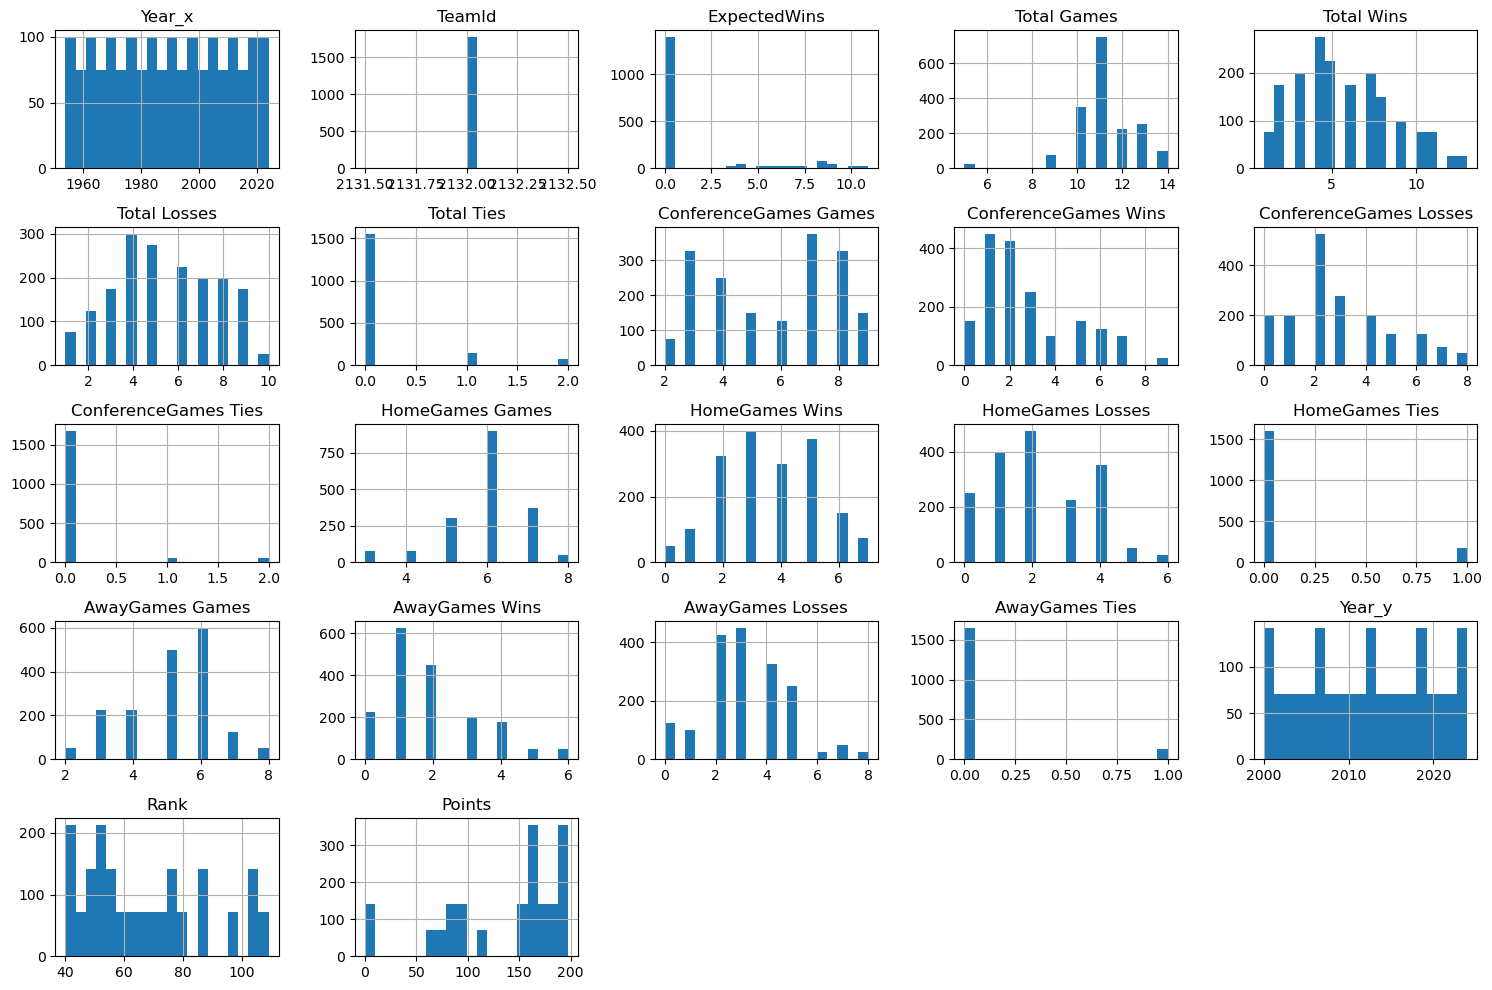

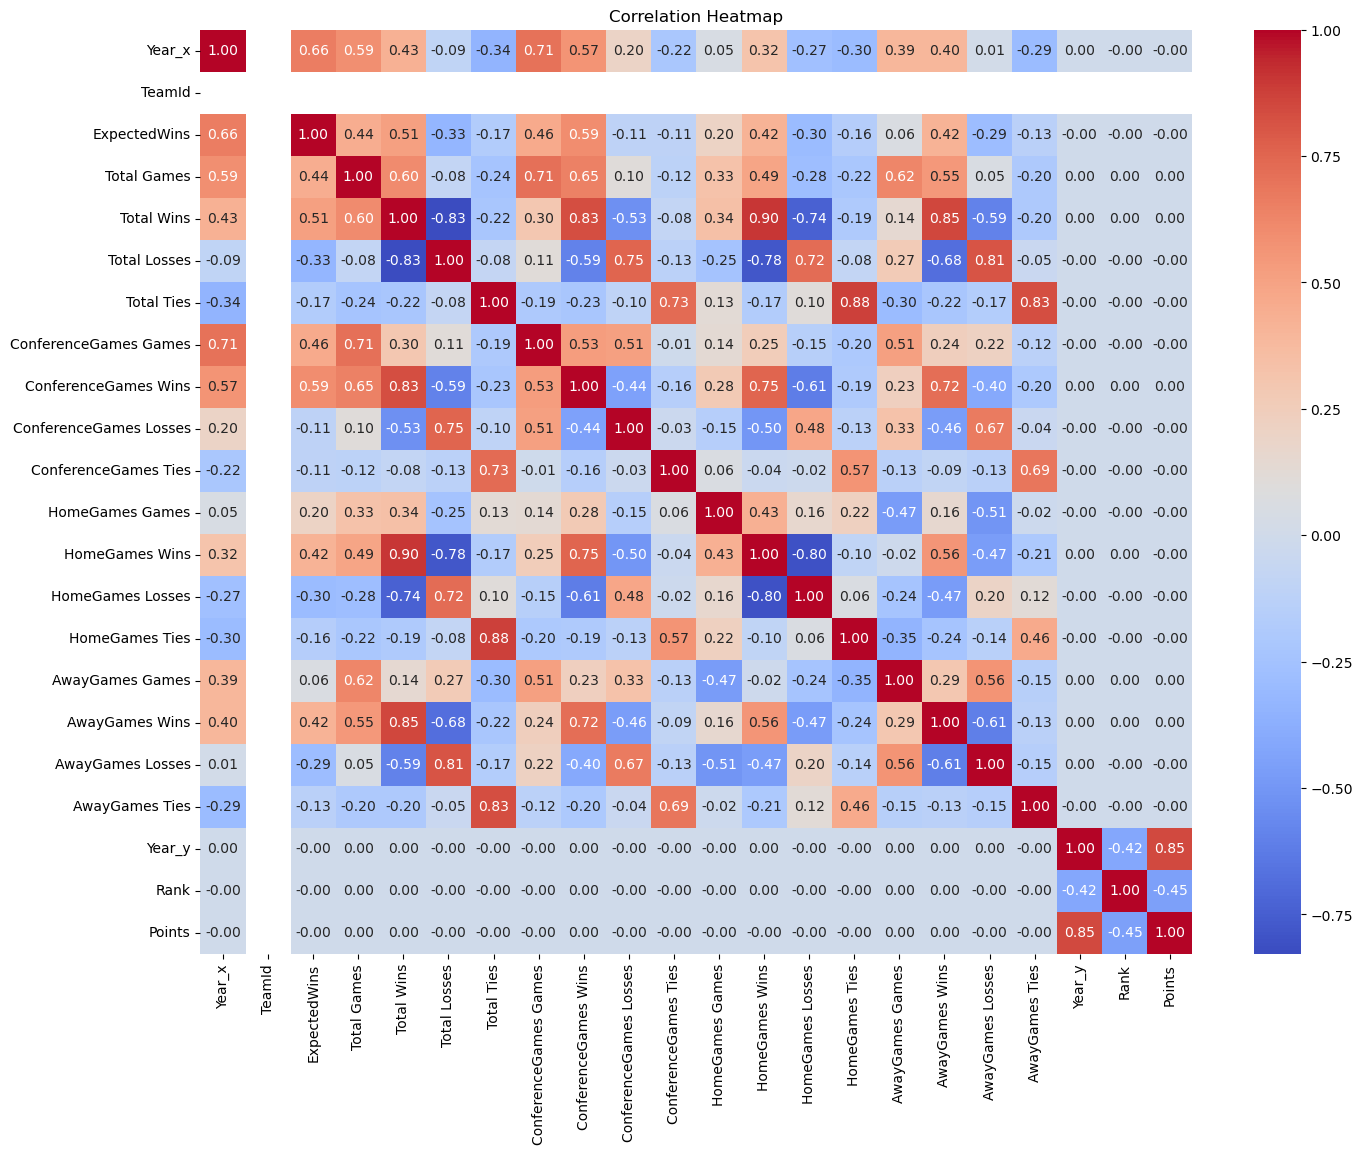

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Summary:")
print(df.describe())

print("Missing Values:")
print(df.isnull().sum())

df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

if numeric_df.empty:
    print("No numeric columns available for correlation heatmap.")
else:
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


'total_wins' and 'total_losses' columns exist.
Checking for missing or invalid values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total_wins    71 non-null     int64
 1   total_losses  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB
None
   total_wins  total_losses
0           7             6
1           8             5
2           8             2
3           6             5
4           5             5
Missing values after conversion:
total_wins      0
total_losses    0
dtype: int64
win_flag value counts:
win_flag
1    37
0    34
Name: count, dtype: int64


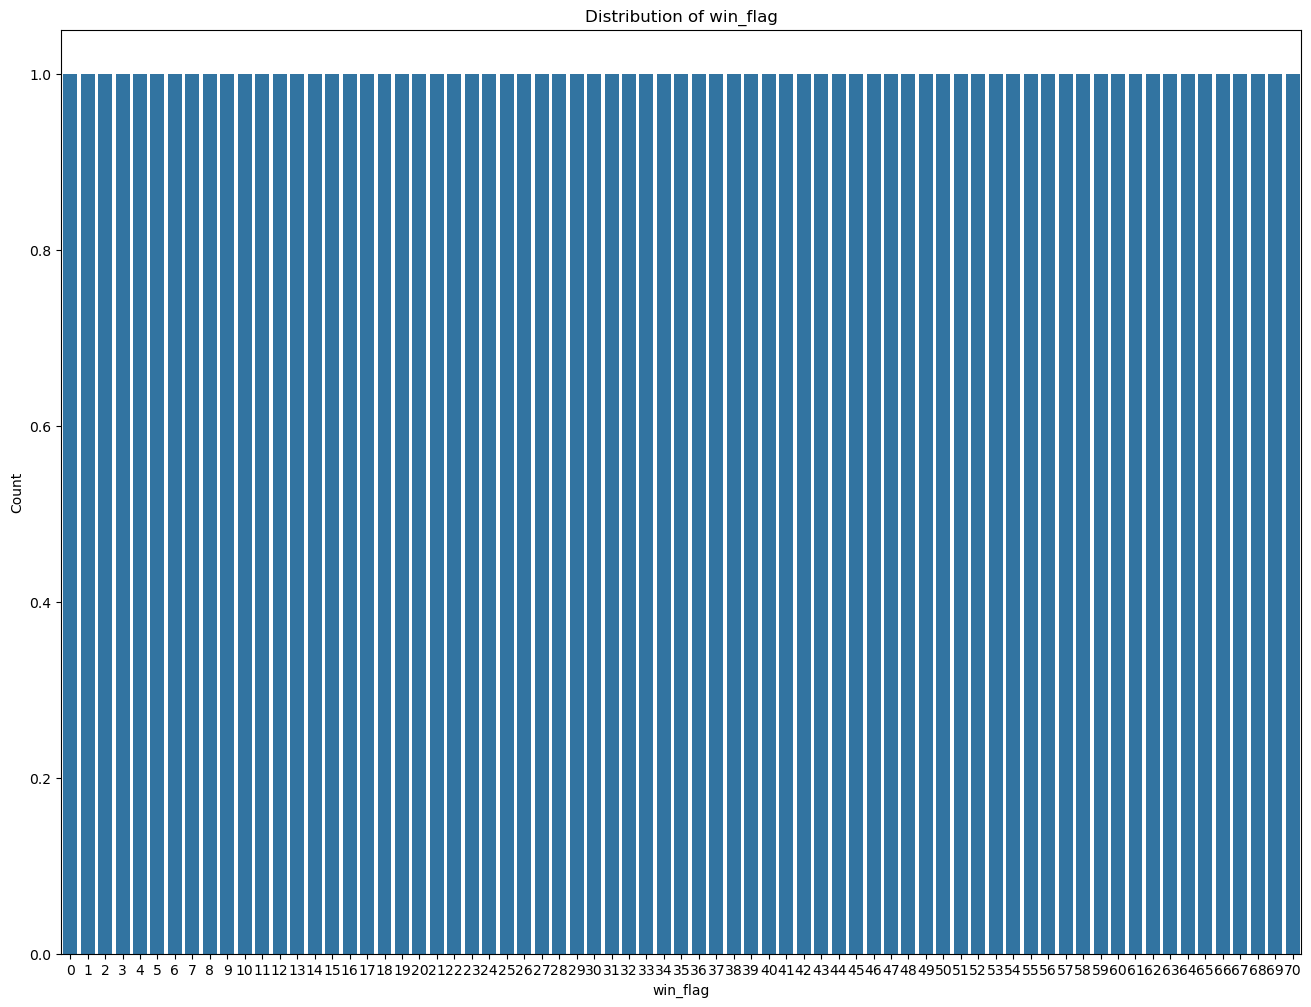

In [71]:
if 'total_wins' in data1.columns and 'total_losses' in data1.columns:
    print("'total_wins' and 'total_losses' columns exist.")

    print("Checking for missing or invalid values:")
    print(data1[['total_wins', 'total_losses']].info())
    print(data1[['total_wins', 'total_losses']].head())

    data1['total_wins'] = pd.to_numeric(data1['total_wins'], errors='coerce')
    data1['total_losses'] = pd.to_numeric(data1['total_losses'], errors='coerce')

    print("Missing values after conversion:")
    print(data1[['total_wins', 'total_losses']].isnull().sum())


    data1['win_flag'] = (data1['total_wins'] > data1['total_losses']).astype(int)

    print("win_flag value counts:")
    print(data1['win_flag'].value_counts())
else:
    print("Columns 'total_wins' or 'total_losses' are missing.")


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
sns.countplot(data1['win_flag'])
plt.title("Distribution of win_flag")
plt.xlabel("win_flag")
plt.ylabel("Count")
plt.show()



In [ ]:
X = data1.drop(columns=['win_flag'], errors='ignore')
y = data1['win_flag']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (71, 22)
y shape: (71,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test data shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training data shape: X_train=(56, 22), y_train=(56,)
Test data shape: X_test=(15, 22), y_test=(15,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [57]:
print("X_train sample:")
print(X_train.head())


X_train sample:
    Year  TeamId        team        Conference Division  ExpectedWins  \
30  1961    2132  cincinnati   Missouri Valley      NaN           0.0   
59  1974    2132  cincinnati  FBS Independents      NaN           0.0   
35  2024    2132  cincinnati            Big 12      NaN           3.4   
58  1987    2132  cincinnati  FBS Independents      NaN           0.0   
42  2002    2132  cincinnati    Conference USA      NaN           0.0   

    Total Games  total_wins  total_losses  Total Ties  ...  \
30           10           3             7           0  ...   
59           11           7             4           0  ...   
35            5           3             2           0  ...   
58           11           4             7           0  ...   
42           14           7             7           0  ...   

    ConferenceGames Losses  ConferenceGames Ties  HomeGames Games  \
30                       2                     0                7   
59                       2        

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)


Model: Logistic Regression
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15

------------------------------
Model: Random Forest
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15

------------------------------


Dataset Overview:
Shape: (71, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    71 non-null     int64  
 1   TeamId                  71 non-null     int64  
 2   team                    71 non-null     object 
 3   Conference              71 non-null     object 
 4   Division                7 non-null      object 
 5   ExpectedWins            71 non-null     float64
 6   Total Games             71 non-null     int64  
 7   total_wins              71 non-null     int64  
 8   total_losses            71 non-null     int64  
 9   Total Ties              71 non-null     int64  
 10  ConferenceGames Games   71 non-null     int64  
 11  ConferenceGames Wins    71 non-null     int64  
 12  ConferenceGames Losses  71 non-null     int64  
 13  ConferenceGames Ties    71 non-null     int64  
 14  HomeGames 

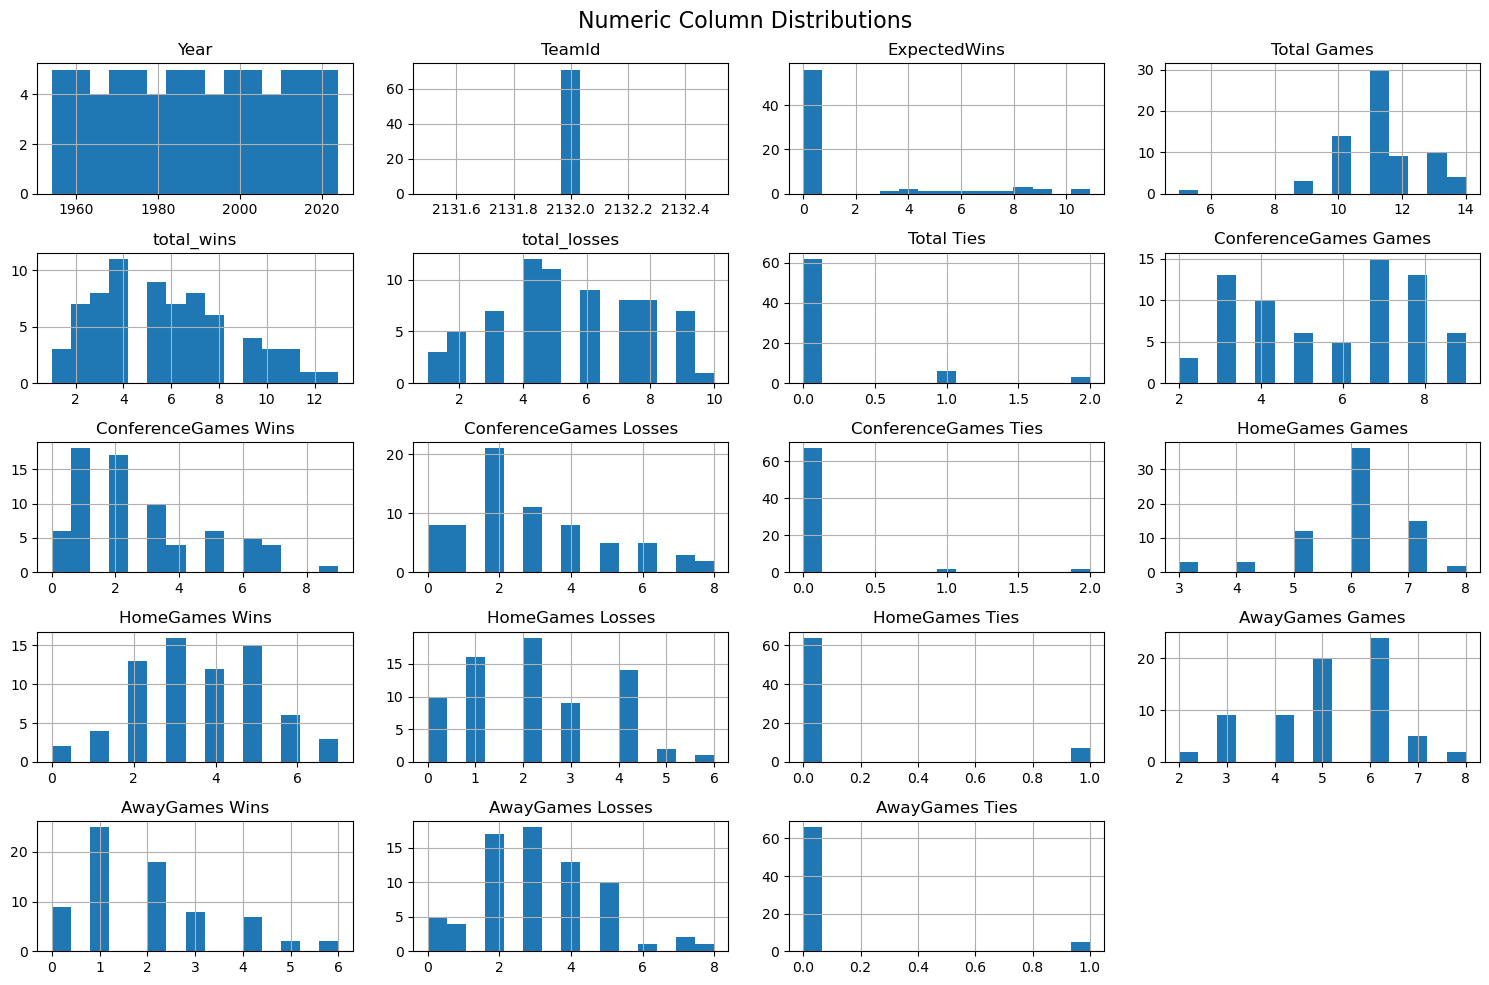


Categorical Columns Frequency Counts:

team Value Counts:
team
cincinnati    71
Name: count, dtype: int64

Conference Value Counts:
Conference
FBS Independents     29
Missouri Valley      13
American Athletic    10
Conference USA        9
Big East              8
Big 12                2
Name: count, dtype: int64

Division Value Counts:
Division
East    7
Name: count, dtype: int64


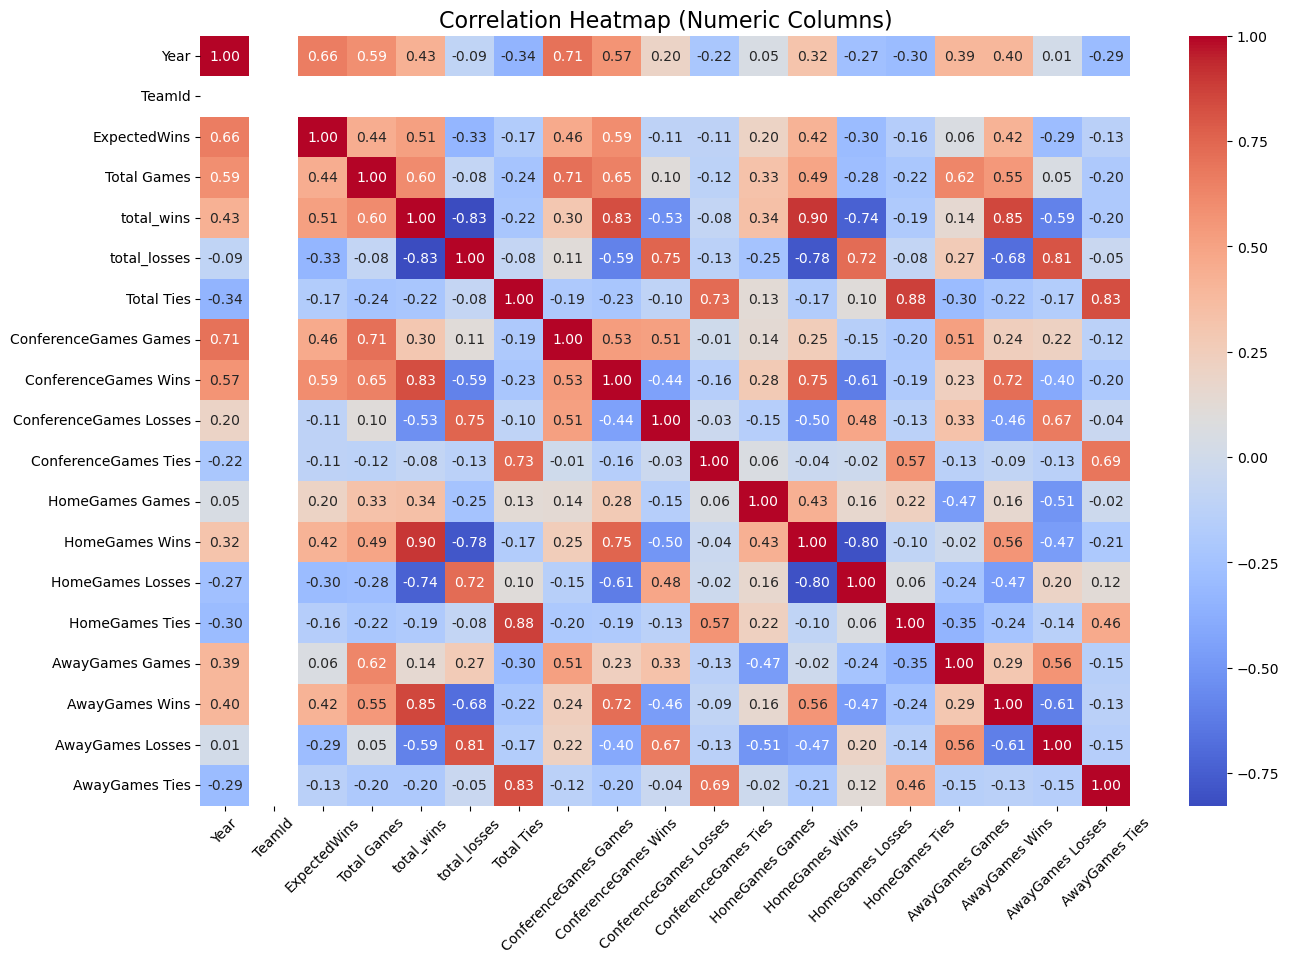

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overview of the Dataset
print("Dataset Overview:")
print(f"Shape: {data1.shape}")
print(data1.info())
print(data1.describe(include='all'))

# 2. Missing Values
print("\nMissing Values:")
missing_values = data1.isnull().sum()
print(missing_values[missing_values > 0])

# 3. Numeric Columns: Summary and Distribution
numeric_cols = data1.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns Summary:")
print(data1[numeric_cols].describe())

# Visualize numeric distributions
data1[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Numeric Column Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 4. Categorical Columns: Frequency Counts
categorical_cols = data1.select_dtypes(include=['object']).columns
print("\nCategorical Columns Frequency Counts:")
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(data1[col].value_counts())


# 5. Correlation Heatmap (Numeric Columns)
if not numeric_cols.empty:
    plt.figure(figsize=(15, 10))
    sns.heatmap(data1[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title("Correlation Heatmap (Numeric Columns)", fontsize=16)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->


### Here are links to where I got the data from (I did a lot of filtering for the exact data I downloaded):
- https://collegefootballdata.com/
- https://www.pff.com/
- https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019
- https://www.kaggle.com/datasets/jonathanpilafas/ncaa-bowl-games

In [63]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 5202 bytes to source.py
